<a href="https://colab.research.google.com/github/Batuh1907/Batuh1907/blob/IE423/Final_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/online_shoppers_intention.csv')

In [4]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
for col in df.columns:
    print("{} have {} unique values: {}".format(col, df[col].nunique(), df[col].dtypes))
    if df[col].dtypes == 'int64' or df[col].dtypes == 'bool':
        print("{} values: {}".format(col,df[col].unique()))

Administrative have 27 unique values: int64
Administrative values: [ 0  1  2  4 12  3 10  6  5  9  8 16 13 11  7 18 14 17 19 15 24 22 21 20
 23 27 26]
Administrative_Duration have 3335 unique values: float64
Informational have 17 unique values: int64
Informational values: [ 0  1  2  4 16  5  3 14  6 12  7  9 10  8 11 24 13]
Informational_Duration have 1258 unique values: float64
ProductRelated have 311 unique values: int64
ProductRelated values: [  1   2  10  19   0   3  16   7   6  23  13  20   8   5  32   4  45  14
  52   9  46  15  22  11  12  36  42  27  90  18  38  17 128  25  30  21
  51  26  28  31  24  50  96  49  68  98  67  55  35  37  29  34  71  63
  87  40  33  54  64  75  39 111  81  61  47  44  88 149  41  79  66  43
 258  80  62  83 173  48  58  57  56  69  82  59 109 287  53  84  78 137
 113  89  65  60 104 129  77  74  93  76  72 194 140 110 132 115  73 328
 160  86 150  95 130 151 117 124 127 125 116 105  92 157 154 220 187 112
 131 159  94 204 142 206 102 313 145  8

In [6]:
df['Revenue'].value_counts(normalize=True)

,proportion
Revenue,
False,0.845255
True,0.154745


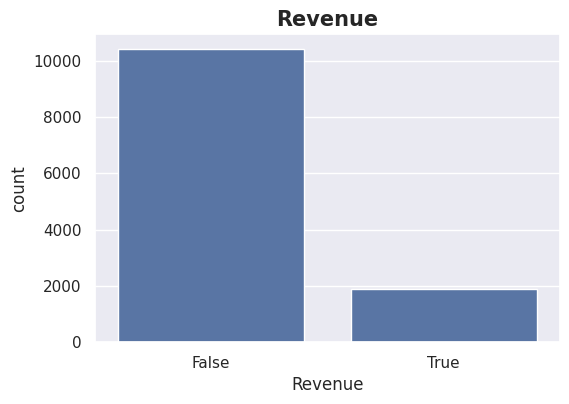

In [7]:
sns.set_theme(style="darkgrid")
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Revenue')
plt.title('Revenue', fontsize=15, fontweight='bold')
plt.show()


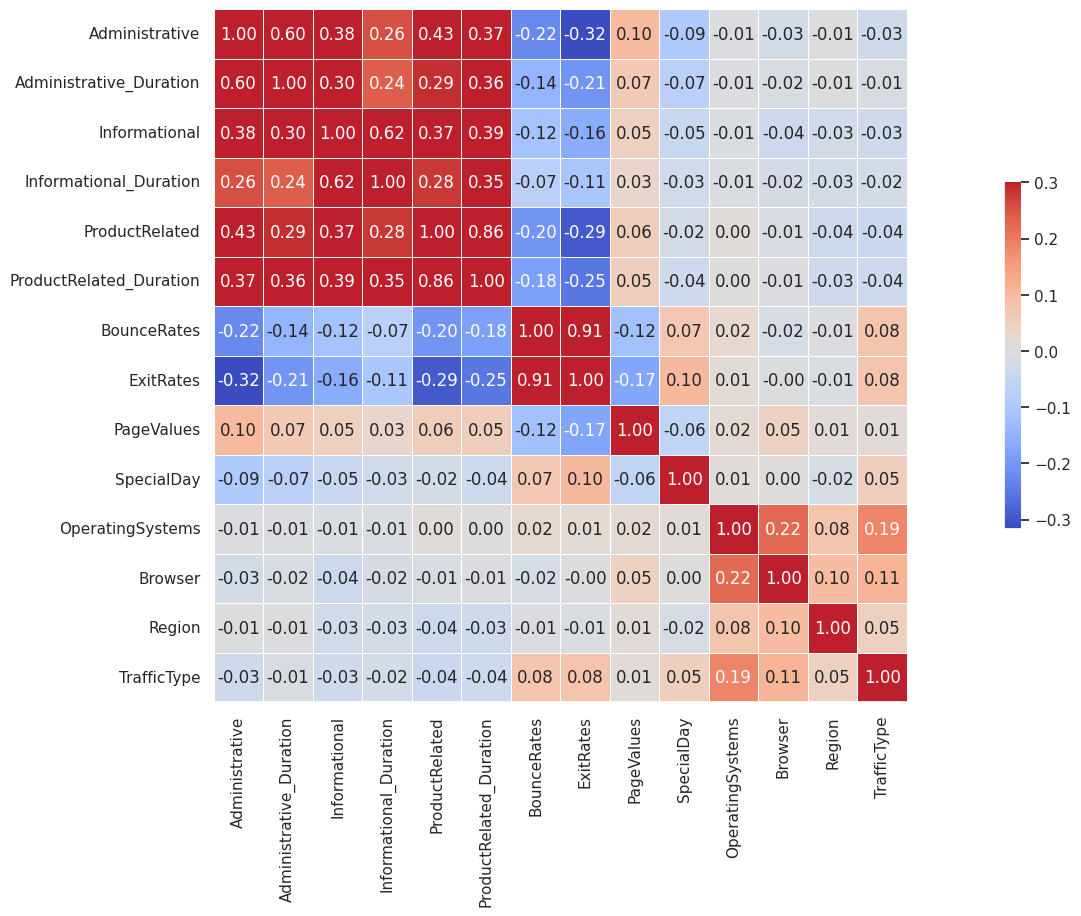

In [8]:
# Select only numerical columns before calculating the correlation
numerical_df = df.select_dtypes(include=['number'])

corr = numerical_df.corr()
g = sns.heatmap(corr, vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(25,9)
plt.show()

In [9]:

# Create new features
df['TotalPageViews'] = df['PageValues'] * df['BounceRates']
df['AvgTimePerProduct'] = df['ProductRelated_Duration'] / df['ProductRelated']



In [10]:
# Create a feature indicating whether the session was on a weekend
df['IsWeekend'] = df['Weekend'].apply(lambda x: 1 if x else 0)

# Create a feature representing the ratio of product related time to total time
df['ProductRelatedTimeRatio'] = df['ProductRelated_Duration'] / df['Administrative_Duration']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# Assuming 'Revenue' is your target variable
X = df.drop('Revenue', axis=1)
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
import numpy as np # Import numpy for handling infinite values

# Assuming 'df' is your DataFrame and 'Revenue' is the target variable
X = df.drop('Revenue', axis=1)
y = df['Revenue']

# Split data into train and test sets BEFORE label encoding
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numerical_cols = X_train.select_dtypes(include=['number']).columns

# Handle missing values in BOTH categorical and numerical columns
if categorical_cols.size > 0:
    imputer_cat = SimpleImputer(strategy='most_frequent')
    X_train[categorical_cols] = imputer_cat.fit_transform(X_train[categorical_cols])
    X_test[categorical_cols] = imputer_cat.transform(X_test[categorical_cols])

if numerical_cols.size > 0:
    # Replace infinite values with NaNs before imputation
    X_train[numerical_cols] = X_train[numerical_cols].replace([np.inf, -np.inf], np.nan)
    X_test[numerical_cols] = X_test[numerical_cols].replace([np.inf, -np.inf], np.nan)

    imputer_num = SimpleImputer(strategy='mean')  # Or another strategy like 'median'
    X_train[numerical_cols] = imputer_num.fit_transform(X_train[numerical_cols])
    X_test[numerical_cols] = imputer_num.transform(X_test[numerical_cols])

# Apply Label Encoding to categorical columns in TRAINING set ONLY IF there are any
if categorical_cols.size > 0:
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col])
        label_encoders[col] = le

    # Transform categorical columns in TEST set
    for col in categorical_cols:
        X_test[col] = label_encoders[col].transform(X_test[col])

# Initialize models
logreg = LogisticRegression()
dtree = DecisionTreeClassifier()
rf = RandomForestClassifier()
svm = SVC()

# Train models
logreg.fit(X_train, y_train)
dtree.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--- Logistic Regression ---
Accuracy: 0.8690
Precision: 0.7340
Recall: 0.3358
F1-score: 0.4608
ROC-AUC: 0.8522


--- Decision Tree ---
Accuracy: 0.8483
Precision: 0.5471
Recall: 0.5231
F1-score: 0.5348
ROC-AUC: 0.7182


--- Random Forest ---
Accuracy: 0.8970
Precision: 0.7625
Recall: 0.5547
F1-score: 0.6423
ROC-AUC: 0.9192


--- SVM ---
Accuracy: 0.8350
Precision: 0.8333
Recall: 0.0122
F1-score: 0.0240
ROC-AUC: 0.8144




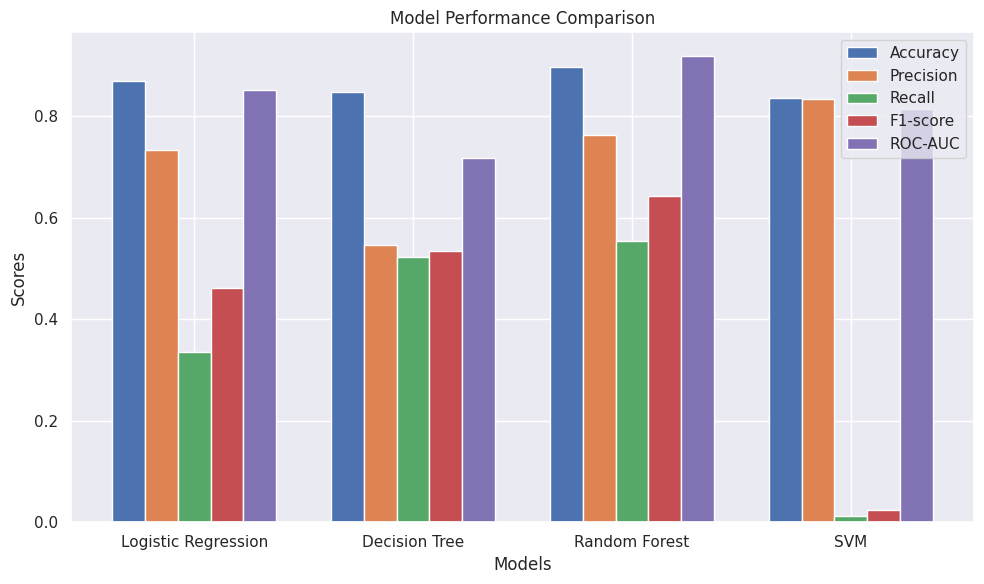

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt


# Sample models
logreg = LogisticRegression(max_iter=1000)
dtree = DecisionTreeClassifier()
rf = RandomForestClassifier()
svm = SVC(probability=True)

# Train models
logreg.fit(X_train, y_train)
dtree.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Evaluate Models
models = [logreg, dtree, rf, svm]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']

# Initialize lists to store metrics for plotting
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_aucs = []

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # ROC-AUC can only be calculated for probabilistic models
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_proba)
    else:
        roc_auc = np.nan  # Use NaN for models without probability output

    # Append metrics to lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    roc_aucs.append(roc_auc)

    # Print metrics
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}" if not np.isnan(roc_auc) else "ROC-AUC: N/A")
    print("\n")

# Plotting
x = np.arange(len(model_names))
width = 0.15  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Create bar plots for each metric
bars1 = ax.bar(x - 2*width, accuracies, width, label='Accuracy')
bars2 = ax.bar(x - width, precisions, width, label='Precision')
bars3 = ax.bar(x, recalls, width, label='Recall')
bars4 = ax.bar(x + width, f1_scores, width, label='F1-score')
bars5 = ax.bar(x + 2*width, roc_aucs, width, label='ROC-AUC')

# Add labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


Best Parameters:  {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}
Best Score:  0.9053122837823805


<ipython-input-19-4a68dc268d75>:39: FutureWarning: The provided callable <function mean at 0x7c7ac6f13d00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = results.pivot_table(values='mean_test_score', index='param_n_estimators', columns='param_max_depth', aggfunc=np.mean)


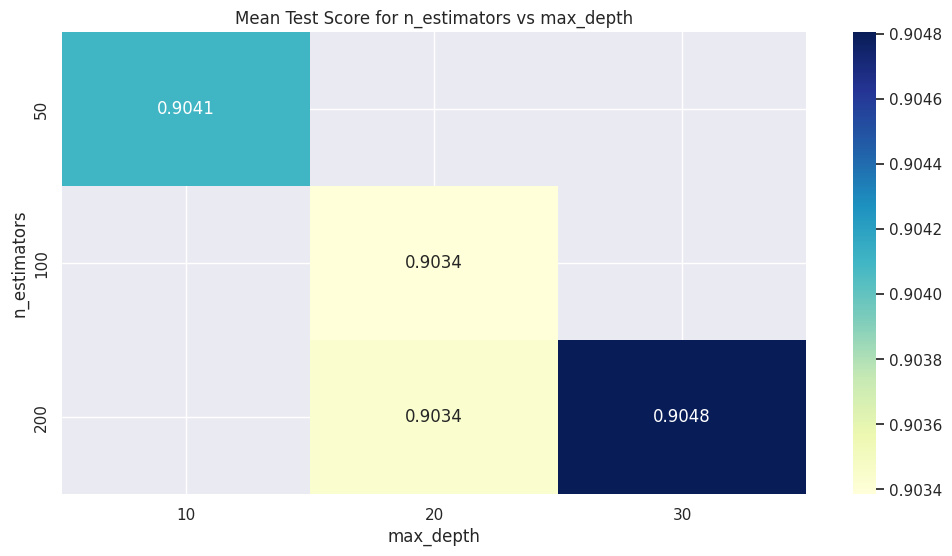

<ipython-input-19-4a68dc268d75>:47: FutureWarning: The provided callable <function mean at 0x7c7ac6f13d00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table2 = results.pivot_table(values='mean_test_score', index='param_min_samples_split', columns='param_min_samples_leaf', aggfunc=np.mean)


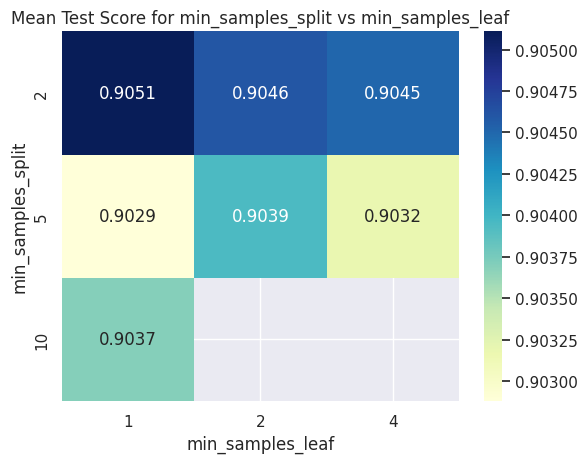

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns

param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
rf = RandomForestClassifier()

# Initialize RandomizedSearchCV with iteration limit
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters: ", best_params)
print("Best Score: ", best_score)

# Extract results from RandomizedSearchCV
results = pd.DataFrame(random_search.cv_results_)

# Visualize the results
plt.figure(figsize=(12, 6))

# Create a heatmap for n_estimators vs max_depth
pivot_table = results.pivot_table(values='mean_test_score', index='param_n_estimators', columns='param_max_depth', aggfunc=np.mean)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".4f")
plt.title('Mean Test Score for n_estimators vs max_depth')
plt.xlabel('max_depth')
plt.ylabel('n_estimators')
plt.show()

# Create a heatmap for min_samples_split vs min_samples_leaf
pivot_table2 = results.pivot_table(values='mean_test_score', index='param_min_samples_split', columns='param_min_samples_leaf', aggfunc=np.mean)
sns.heatmap(pivot_table2, annot=True, cmap='YlGnBu', fmt=".4f")
plt.title('Mean Test Score for min_samples_split vs min_samples_leaf')
plt.xlabel('min_samples_leaf')
plt.ylabel('min_samples_split')
plt.show()

Cross-validation scores: [0.92133009 0.89821573 0.89213301 0.8783455  0.88767234]
Average accuracy: 0.90 (+/- 0.03)


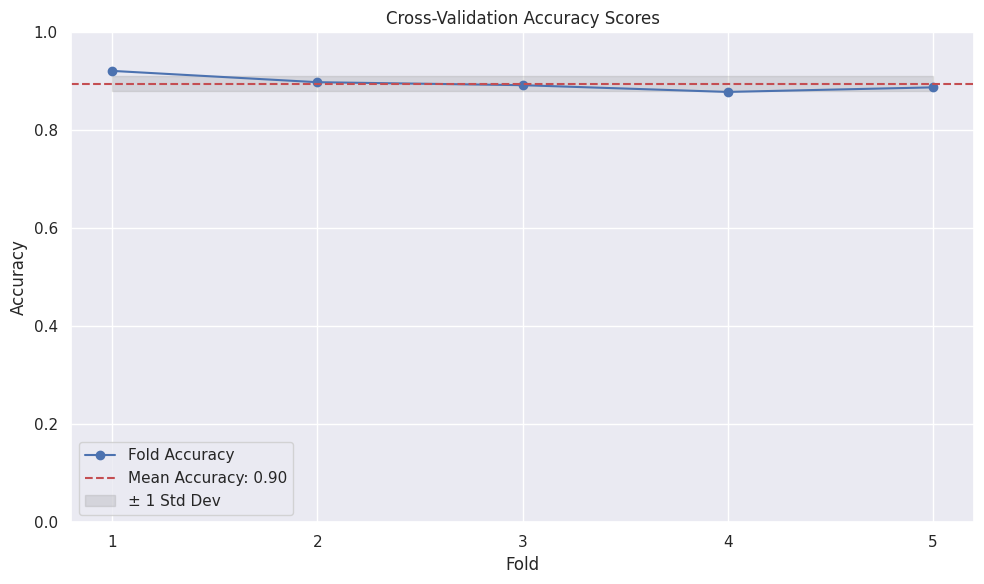

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import numpy as np

X = df.drop('Revenue', axis=1)
y = df['Revenue']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['number']).columns

# Handle missing values in BOTH categorical and numerical columns
if categorical_cols.size > 0:
    imputer_cat = SimpleImputer(strategy='most_frequent')
    X[categorical_cols] = imputer_cat.fit_transform(X[categorical_cols])

if numerical_cols.size > 0:
    # Replace infinite values with NaNs before imputation
    X[numerical_cols] = X[numerical_cols].replace([np.inf, -np.inf], np.nan)
    imputer_num = SimpleImputer(strategy='mean')  # Or another strategy like 'median'
    X[numerical_cols] = imputer_num.fit_transform(X[numerical_cols])

# Apply Label Encoding to categorical columns IF there are any
if categorical_cols.size > 0:
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])  # Encode the ENTIRE dataset

# Initialize your model
model = RandomForestClassifier()  # Replace with your chosen model

# Perform cross-validation (e.g., 5-fold)
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # Use appropriate scoring metric

# Print the scores for each fold
print("Cross-validation scores:", scores)

# Print the average score and standard deviation
print("Average accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# Plotting cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-', color='b', label='Fold Accuracy')
plt.axhline(y=scores.mean(), color='r', linestyle='--', label=f'Mean Accuracy: {scores.mean():.2f}')
plt.fill_between(range(1, len(scores) + 1), scores.mean() - scores.std(), scores.mean() + scores.std(), color='gray', alpha=0.2, label='± 1 Std Dev')
plt.title('Cross-Validation Accuracy Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(scores) + 1))
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()